In [22]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt


In [2]:
from keras import backend as K

print(K.backend())

tensorflow


In [3]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Create the model
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

W0000 00:00:1762105995.264321    6721 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1762105995.268292    6721 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1762105995.428843    6721 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13121 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5070 Ti, pci bus id: 0000:01:00.0, compute capability: 12.0a


In [5]:
model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
batch_size = 4
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5


I0000 00:00:1762105997.458884    6907 service.cc:158] XLA service 0x7602e4032350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762105997.458921    6907 service.cc:166]   StreamExecutor device (0): NVIDIA GeForce RTX 5070 Ti, Compute Capability 12.0a
I0000 00:00:1762105997.486913    6907 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762105997.580949    6907 cuda_dnn.cc:463] Loaded cuDNN version 91002


   77/11250 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.1532 - loss: 2.3453

I0000 00:00:1762105999.170599    6907 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11250/11250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.4538 - loss: 1.5191 - val_accuracy: 0.5862 - val_loss: 1.1861
Epoch 2/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5659 - loss: 1.2366 - val_accuracy: 0.6258 - val_loss: 1.0752
Epoch 3/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5952 - loss: 1.1543 - val_accuracy: 0.6612 - val_loss: 0.9765
Epoch 4/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6098 - loss: 1.1118 - val_accuracy: 0.6648 - val_loss: 0.9820
Epoch 5/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6246 - loss: 1.0792 - val_accuracy: 0.6872 - val_loss: 0.9370


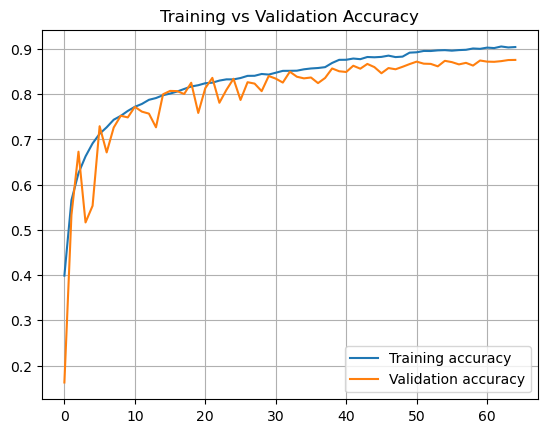

In [19]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

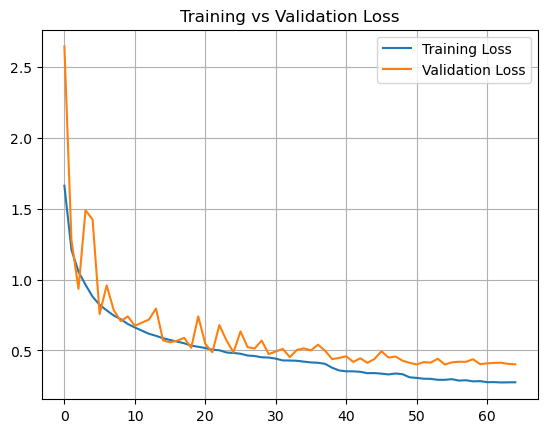

In [20]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Test loss: 0.980583906173706
Test accuracy: 0.6650000214576721
Final training accuracy: 0.6246222257614136
Final training loss: 1.0791682004928589
Final validation accuracy: 0.6872000098228455
Final validation loss: 0.9370028376579285


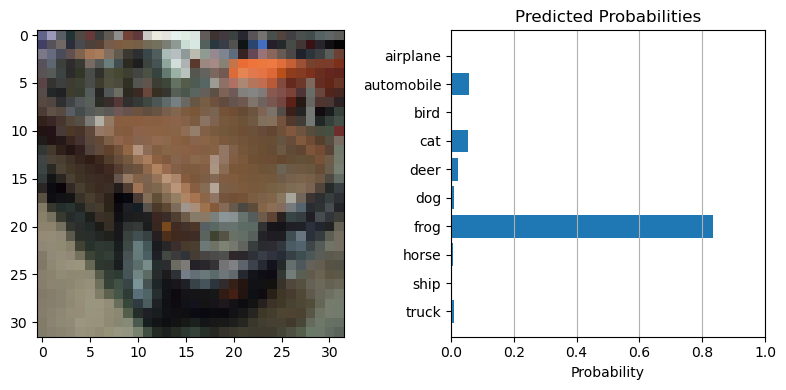

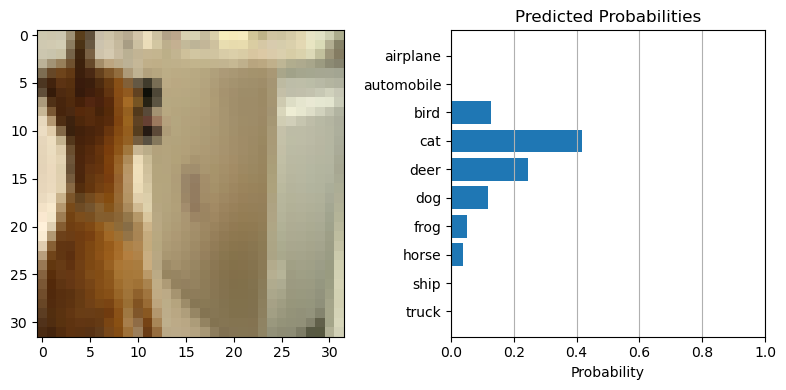

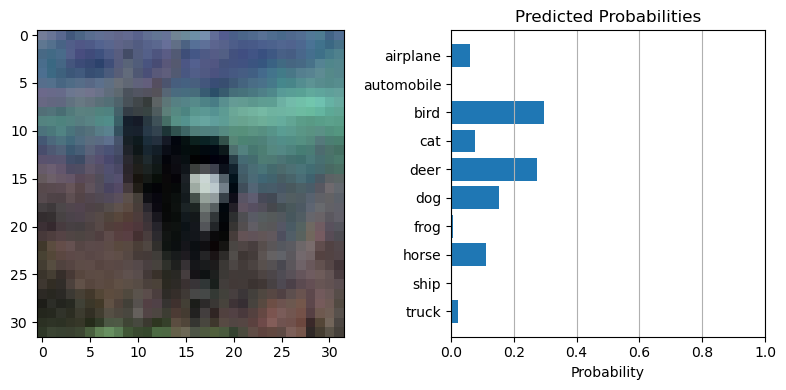

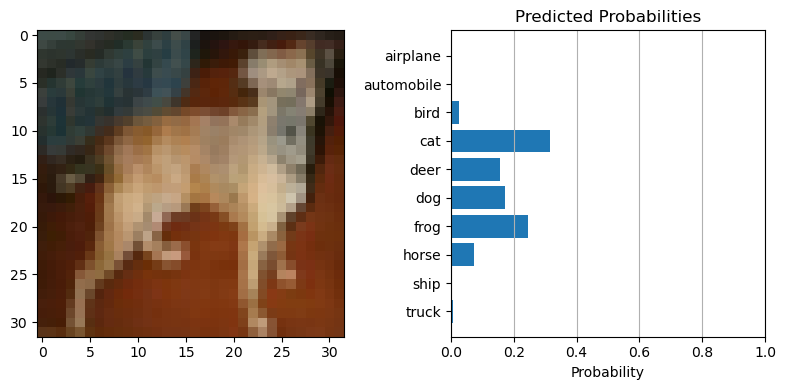

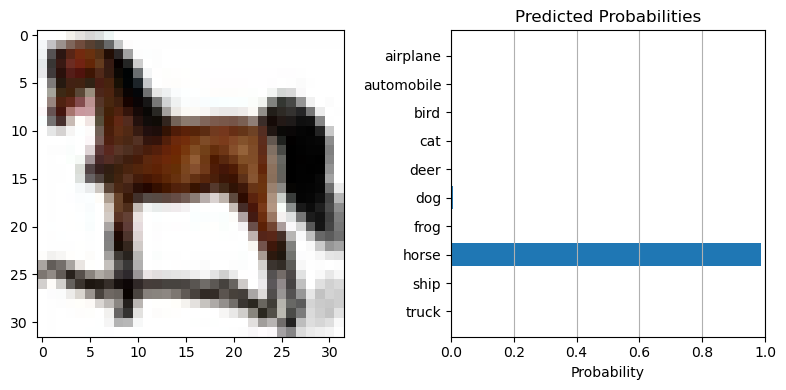

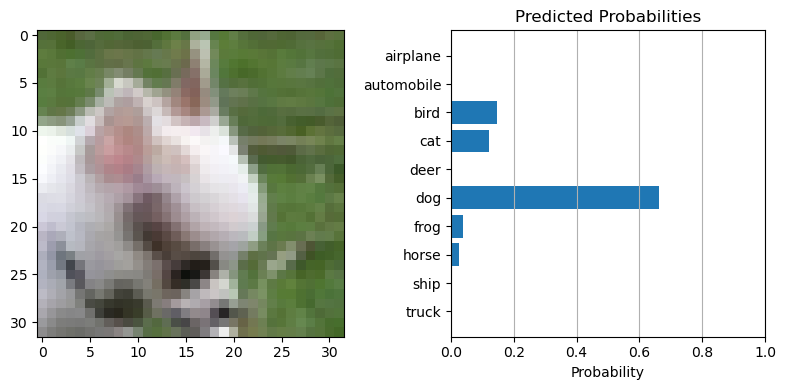

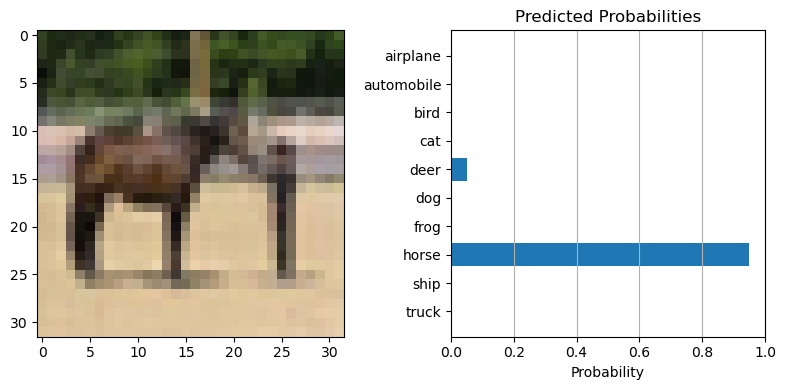

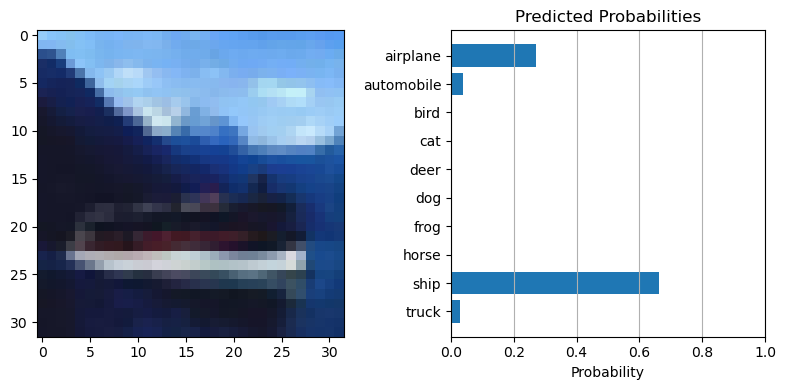

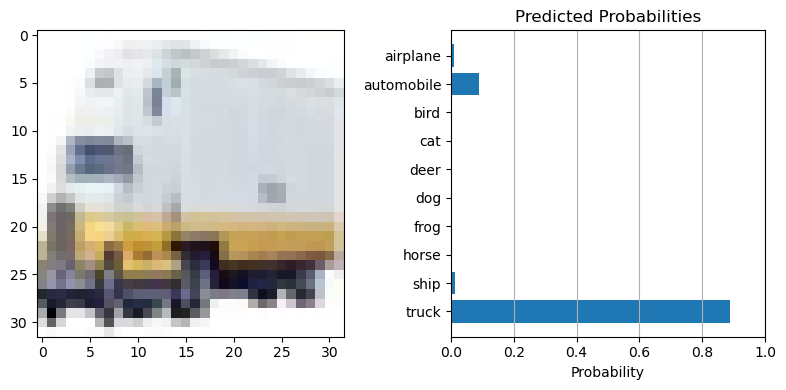

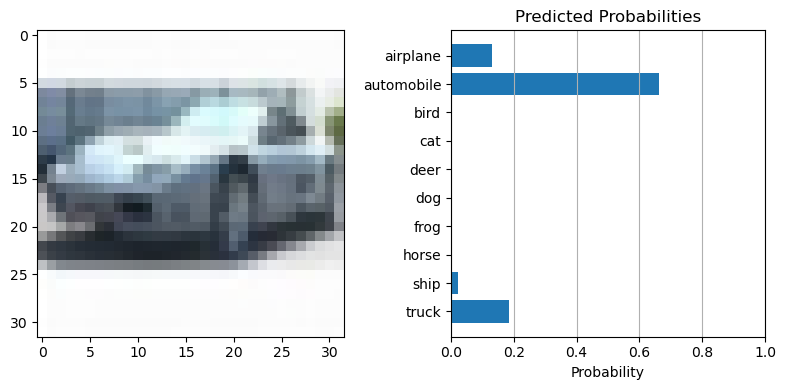

In [9]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4))  # Increased figure height for better horizontal plot
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.barh(ind, y[start + k].numpy().flatten())  # Use barh for horizontal bars
    plt.yticks(ind, targets)  # Use yticks for vertical labels
    plt.gca().invert_yaxis()  # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability")  # Label the x-axis as probability
    plt.title("Predicted Probabilities")  # Add a title to the bar plot
    plt.xlim(0, 1)  # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x')  # Add grid lines for the x-axis
    plt.tight_layout()  # Adjust layout to prevent labels overlapping
    plt.show()

# Modifying the model
---
Here we start to tinker with the parameters of the model, testing adding layers, optimizers and callbacks.





In [10]:
print(K.backend())

tensorflow


In [11]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [12]:
# Create the model
inputs = keras.Input(shape=input_shape)

x = keras.layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)



x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.3)(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Conv2D(128, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)


x = keras.layers.Conv2D(128, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5)(x)

x = layers.Flatten()(x)

x = keras.layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = keras.layers.Dropout(0.5)(x)




outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")


In [13]:
model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 552,426 (2.11 MB)

 Trainable params: 551,274 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [14]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.src.callbacks import ReduceLROnPlateau

# increased batch size and epochs to make processing faster and more reliable
batch_size = 128
epochs = 250

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=1e-6, verbose=1)

# increase learning rate from 0.0001
optimizer = Adam(learning_rate=0.002)
# add early stop to auto stop processing if values are not getting better
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# change validation split to 0.2 to get better results
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/250


I0000 00:00:1762106121.530859    8700 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_8', 300 bytes spill stores, 300 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3988 - loss: 1.6630 - val_accuracy: 0.1625 - val_loss: 2.6473 - learning_rate: 0.0020
Epoch 2/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5657 - loss: 1.2116 - val_accuracy: 0.5327 - val_loss: 1.2795 - learning_rate: 0.0020
Epoch 3/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6255 - loss: 1.0560 - val_accuracy: 0.6730 - val_loss: 0.9350 - learning_rate: 0.0020
Epoch 4/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6626 - loss: 0.9637 - val_accuracy: 0.5165 - val_loss: 1.4904 - learning_rate: 0.0020
Epoch 5/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6913 - loss: 0.8794 - val_accuracy: 0.5533 - val_loss: 1.4247 - learning_rate: 0.0020
Epoch 6/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7126 - loss: 0.8216 - val_accuracy: 0.7294 - val_loss: 0.7563 - learning_rate: 0.0020
Epoch 7/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7269 - loss: 0.7828 - val

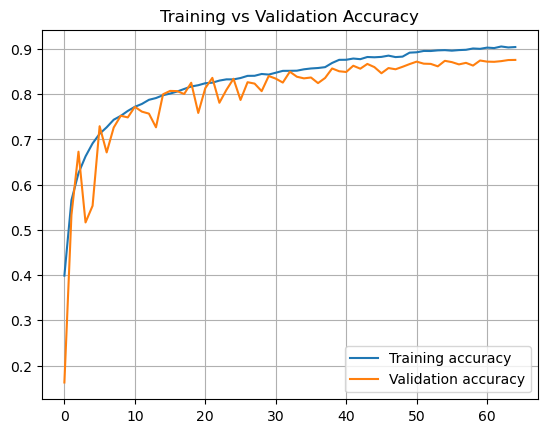

In [15]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

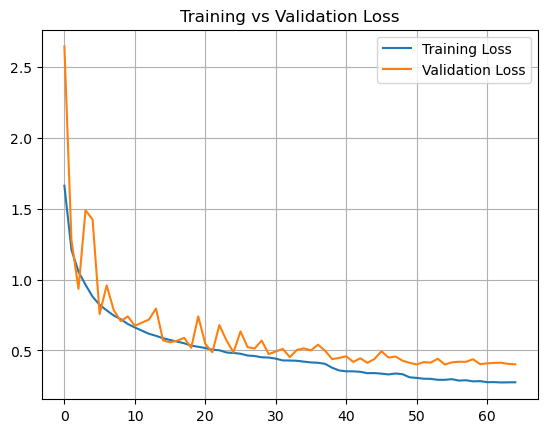

In [16]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Test loss: 0.4180746078491211
Test accuracy: 0.869700014591217
Final training accuracy: 0.9044749736785889
Final training loss: 0.2745198607444763
Final validation accuracy: 0.8759999871253967
Final validation loss: 0.4015260338783264


In [21]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4))  # Increased figure height for better horizontal plot
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.barh(ind, y[start + k].numpy().flatten())  # Use barh for horizontal bars
    plt.yticks(ind, targets)  # Use yticks for vertical labels
    plt.gca().invert_yaxis()  # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability")  # Label the x-axis as probability
    plt.title("Predicted Probabilities")  # Add a title to the bar plot
    plt.xlim(0, 1)  # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x')  # Add grid lines for the x-axis
    plt.tight_layout()  # Adjust layout to prevent labels overlapping
    plt.show()

W0000 00:00:1762107127.686054    6721 bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.22GiB (rounded to 1310720000)requested by op Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
I0000 00:00:1762107127.686160    6721 bfc_allocator.cc:1049] BFCAllocator dump for GPU_0_bfc
I0000 00:00:1762107127.686168    6721 bfc_allocator.cc:1056] Bin (256): 	Total Chunks: 220, Chunks in use: 219. 55.0KiB allocated for chunks. 54.8KiB in use in bin. 8.1KiB client-requested in use in bin.
I0000 00:00:1762107127.686179    6721 bfc_allocator.cc:1056] Bin (512): 	Total Chunks: 29, Chunks in use: 27. 14.5KiB allocated for chunks. 13.5KiB in use in bin. 13.5KiB client-requested in use in bin.
I0000 00:00:1762107127.686182    6721 bfc_allocator.cc:1056] Bin (1024): 	Total Chunks: 1, Chunks in use: 1. 1.2KiB alloc

ResourceExhaustedError: Exception encountered when calling Conv2D.call().

[1m{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[10000,32,32,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D][0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(10000, 32, 32, 3), dtype=float32)

   6721 bfc_allocator.cc:1105] InUse at b0d6bc600 of size 256 next 280
I0000 00:00:1762107127.686495    6721 bfc_allocator.cc:1105] InUse at b0d6bc700 of size 256 next 269
I0000 00:00:1762107127.686496    6721 bfc_allocator.cc:1105] InUse at b0d6bc800 of size 256 next 265
I0000 00:00:1762107127.686497    6721 bfc_allocator.cc:1105] InUse at b0d6bc900 of size 256 next 257
I0000 00:00:1762107127.686498    6721 bfc_allocator.cc:1105] InUse at b0d6bca00 of size 256 next 272
I0000 00:00:1762107127.686500    6721 bfc_allocator.cc:1105] InUse at b0d6bcb00 of size 256 next 281
I0000 00:00:1762107127.686501    6721 bfc_allocator.cc:1105] InUse at b0d6bcc00 of size 256 next 294
I0000 00:00:1762107127.686502    6721 bfc_allocator.cc:1105] InUse at b0d6bcd00 of size 256 next 298
I0000 00:00:1762107127.686503    6721 bfc_allocator.cc:1105] InUse at b0d6bce00 of size 256 next 274
I0000 00:00:1762107127.686504    6721 bfc_allocator.cc:1105] InUse at b0d6bcf00 of size 5120 next 286
I0000 00:00:1762107

In [21]:
model.save('./mnist_cnn.keras')


In [22]:
model = keras.models.load_model('mnist_cnn.keras')
